In [540]:
# Add relevant modules
import pandas as pd
import numpy as np
import os
from scipy import signal
from scipy.io import wavfile
import math
import sys
import pyaudio
import wave
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

In [541]:
#loads the file and its sampling frequency
fs, data = wavfile.read('Recordings/Input.wav')
#open a wav format music  
f = wave.open("Recordings/Input.wav","rb")  
#instantiate PyAudio  
p = pyaudio.PyAudio()  

chunk = 1024

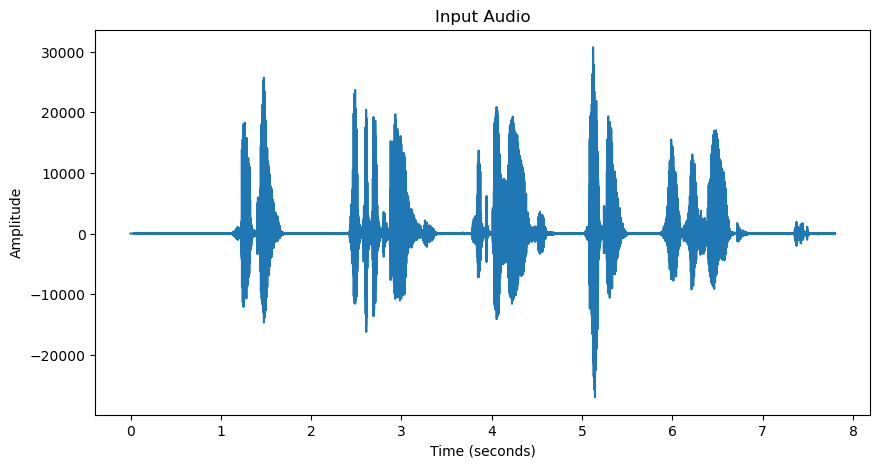

In [542]:
#Plot Input Audio
file_path = 'Recordings/Input.wav'

with wave.open(file_path, 'rb') as wav_file:
    sample_rate = wav_file.getframerate()
    num_frames = wav_file.getnframes()
    duration = num_frames / sample_rate

    # Read audio data
    audio_data = np.frombuffer(wav_file.readframes(num_frames), dtype=np.int16)

time = np.linspace(0, duration, num_frames)

plt.figure(figsize=(10, 5))
plt.plot(time, audio_data)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Input Audio')
output_file = 'Input.png'
plt.savefig(output_file)
plt.show()


In [543]:
#open stream  
stream = p.open(format = p.get_format_from_width(f.getsampwidth()),  
                channels = f.getnchannels(),  
                rate = f.getframerate(),  
                output = True)  
#read data  
data = f.readframes(chunk)  

In [544]:
#play stream  
while data:  
    stream.write(data)  
    data = f.readframes(chunk)  

In [545]:
#stop stream  
stream.stop_stream()  
stream.close()  

In [546]:
#close PyAudio  
p.terminate() 

In [547]:
#adjust framerate and convert stereo to mono and output new file
data1, sample_rate = librosa.load( 'Recordings/Input.wav', sr=16000, mono=True )
wavfile.write('Downsampled.wav', sample_rate, data1)

#load new downsampled wav
fs2, data2 = wavfile.read('Downsampled.wav')

In [548]:
#set chunk length
chunk_length = 400


In [549]:
#split into chunks with set overlap
fs, data = wavfile.read('Recordings/Input.wav')
#open a wav format music  
f = wave.open("Recordings/Input.wav","rb")  
overlap = -600

chunks = []
start = 0
length_of_audio = len(data)
while start < length_of_audio:
    end = start + chunk_length
    if end > len(data):
        chunk = data[start:length_of_audio]
    else:
        chunk = data[start:end]
    chunks.append(chunk)
    start += chunk_length - overlap

chunks

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [700]:
bandpass_array = []

# Define bandpass parameters
num_filters = 155
order = 3
sample_rate = 16000
centre_freq = 100
band_width = 50
spacing = 50

# Create an array of bandpass filters
for i in range (num_filters):
    # Equally space upper and lower bounds around the centre frequency
    lower_freq = (centre_freq + spacing * i) - band_width / 2
    upper_freq = (centre_freq + spacing * i) + band_width / 2

    # Create the bandpass filter
    sos = signal.butter(order,[lower_freq, upper_freq], btype='bandpass', output='sos', fs = sample_rate)
    
    # Add the bandpass filter to the array
    bandpass_array.append(sos)

In [701]:
filtered_chunks = []
synthesized_chunks = []
rms_values = []
sin_values = []

# Apply bank of bandpass filters to each chunk
for chunk in chunks:
    chunks_filtered = []
    for i, bandpass_filter in enumerate(bandpass_array):
        #apply filters
        filtered_chunk = signal.sosfilt(bandpass_filter, chunk)
        filtered_chunks.append(filtered_chunk)
        #get rms values
        rms = np.sqrt(np.mean(filtered_chunk**2))
        rms_values.append(rms)
        #synthesize chunks
        chunk_time = i * chunk_length
        time = np.arange(chunk_time, chunk_time + chunk_length)
        time_in_seconds = time / sample_rate
        sin_wave = np.sin(2 * np.pi * (centre_freq + spacing * i) * time_in_seconds)
        varying_amplitude = rms * sin_wave
        for val in sin_wave.tolist():
            sin_values.append(val)
        chunks_filtered.append(varying_amplitude)
    synthesized_chunks.append(np.sum(chunks_filtered, axis=0))
    
filtered_chunks


[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [702]:
#concatenate filtered chunks
concatenated_chunks = []

concatenated_chunks = np.concatenate(synthesized_chunks)

concatenated_chunks

array([0.        , 0.        , 0.        , ..., 0.1370407 , 0.08936403,
       0.04343809])

In [703]:
#output a wav file using concatenated chunks
num_channels = 1
bytes = 2
sample_rate = 16000
num_frames = len(concatenated_chunks)

with wave.open('Output.wav', 'w') as output_file:
        output_file.setparams((num_channels, bytes, sample_rate, num_frames, "NONE", "Uncompressed"))
        output_file.writeframes(concatenated_chunks.astype(np.int16).tobytes())

In [704]:
#Plot

duration = len(data) / fs
audio_time = np.linspace(0, duration, len(concatenated_chunks))
plt.figure(figsize=(10, 5))
plt.plot(audio_time, concatenated_chunks)
plt.title("Output Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.savefig('Output.png')    
plt.clf()


<Figure size 1000x500 with 0 Axes>